# EDA

#### EDA (Exploratory Data Analysis) is the process of analyzing and summarizing a dataset to understand its structure, detect patterns, identify anomalies, and develop hypotheses before applying formal statistical models or machine learning techniques.

## Setup

In [30]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


## Load Your Dataset

In [31]:
# Load dataset
df = pd.read_excel(r"D:\Exccel Work\Financial Sample.xlsx")  # Change file path if needed

# Preview dataset
df.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Product ID
0,Government,Canada,Carretera,NaN,1618.50,3,20,32370.00,0.00,32370.00,16185.00,16185.00,2014-01-01,1,January,2014,PRD-4821-B8L
1,Government,Germany,Carretera,NaN,1321.00,3,20,26420.00,0.00,26420.00,13210.00,13210.00,2014-01-01,1,January,2014,PRD-5711-N6S
2,Midmarket,France,Carretera,NaN,2178.00,3,15,32670.00,0.00,32670.00,21780.00,10890.00,2014-06-01,6,June,2014,PRD-9073-H7N
3,Midmarket,Germany,Carretera,NaN,888.00,3,15,13320.00,0.00,13320.00,8880.00,4440.00,2014-06-01,6,June,2014,PRD-5809-N2R
4,Midmarket,Mexico,Carretera,NaN,2470.00,3,15,37050.00,0.00,37050.00,24700.00,12350.00,2014-06-01,6,June,2014,PRD-2093-P7V


## Basic Dataset Information

In [32]:
# Shape of dataset
print("Shape:", df.shape)

# Data types and non-null counts
print("\nInfo:")
print(df.info())

# Summary statistics for numerical columns
print("\nDescribe:")
print(df.describe().T)

# Summary statistics for categorical columns
print("\nCategorical Summary:")
print(df.describe(include=['object']))


Shape: (700, 17)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Numbe

## Missing Value Analysis

Missing values:
 Discount Band    53
dtype: int64


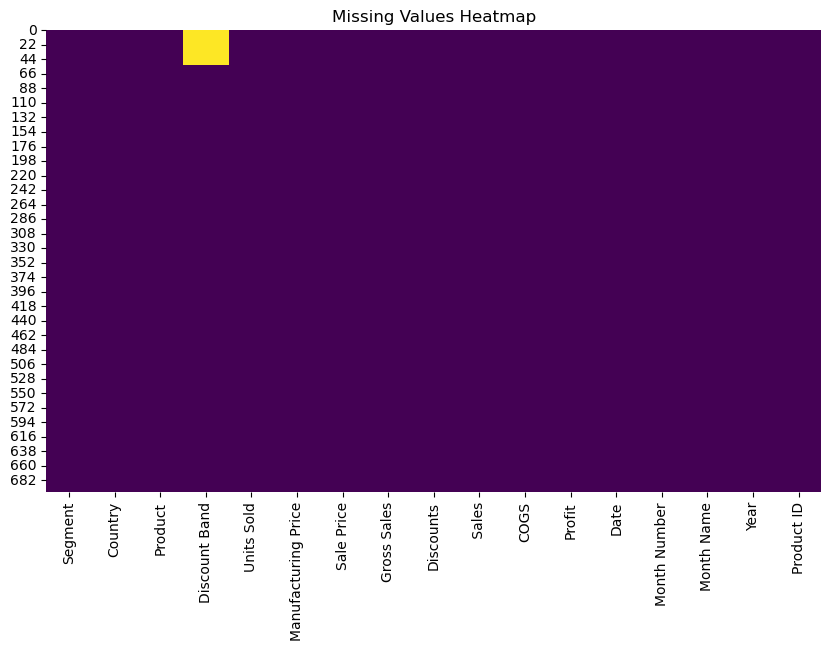

In [33]:
# Count missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


## Descriptive Statistics

Means:
 Units Sold              1608.29
Manufacturing Price       96.48
Sale Price               118.43
Gross Sales           182759.43
Discounts              13150.35
 Sales                169609.07
COGS                  145475.21
Profit                 24133.86
Month Number               7.90
Year                    2013.75
dtype: float64

Medians:
 Units Sold             1542.50
Manufacturing Price      10.00
Sale Price               20.00
Gross Sales           37980.00
Discounts              2585.25
 Sales                35540.20
COGS                  22506.25
Profit                 9242.20
Month Number              9.00
Year                   2014.00
dtype: float64

Standard Deviations:
 Units Sold               867.43
Manufacturing Price      108.60
Sale Price               136.78
Gross Sales           254262.28
Discounts              22962.93
 Sales                236726.35
COGS                  203865.51
Profit                 42760.63
Month Number               3.38
Year      

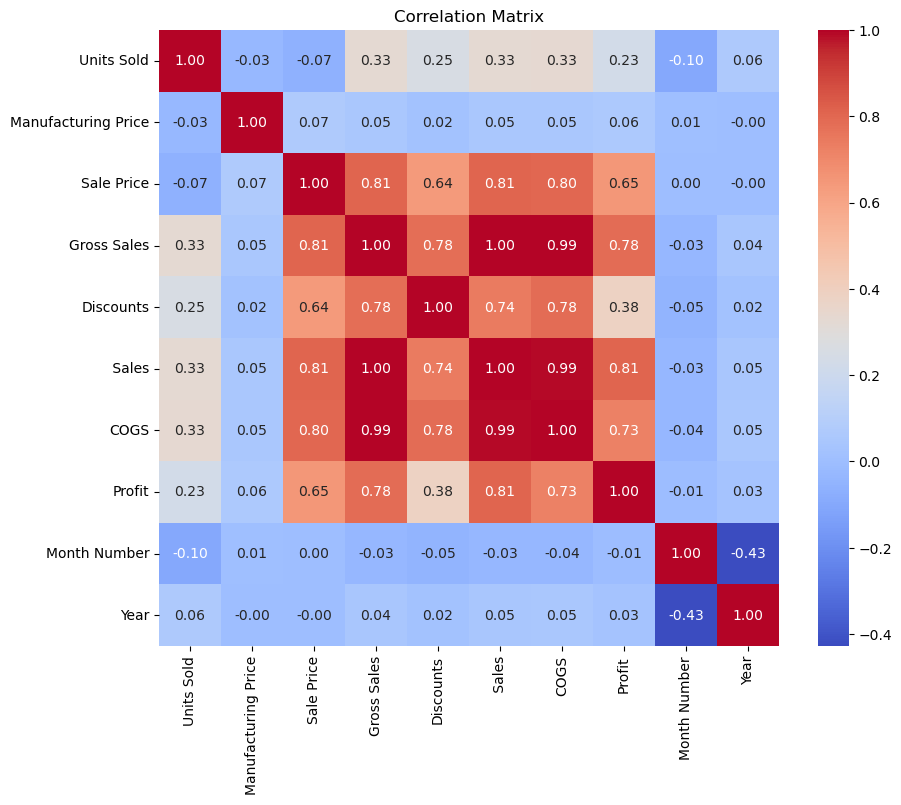

In [34]:
# Mean, Median, Standard Deviation
print("Means:\n", df.mean(numeric_only=True))
print("\nMedians:\n", df.median(numeric_only=True))
print("\nStandard Deviations:\n", df.std(numeric_only=True))

# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Data Visualization

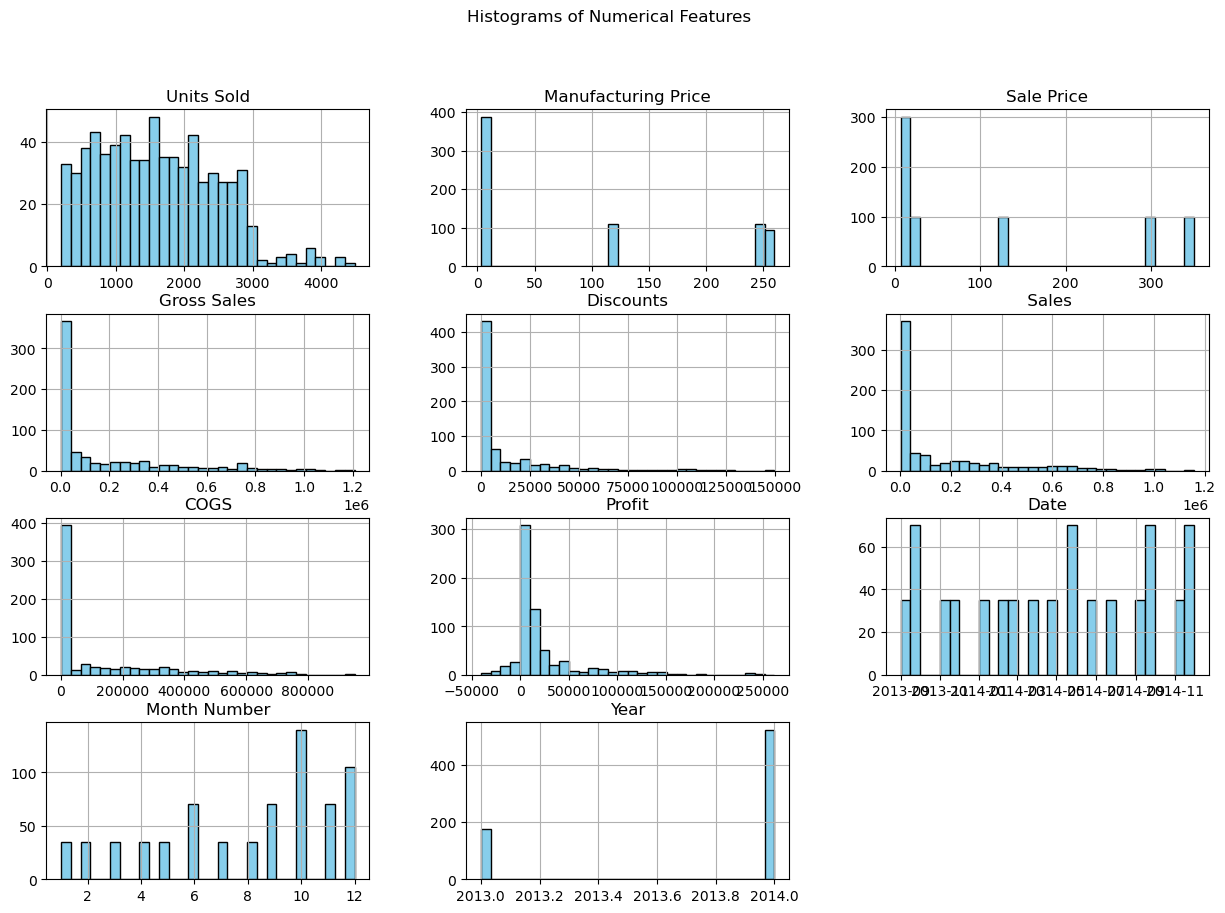

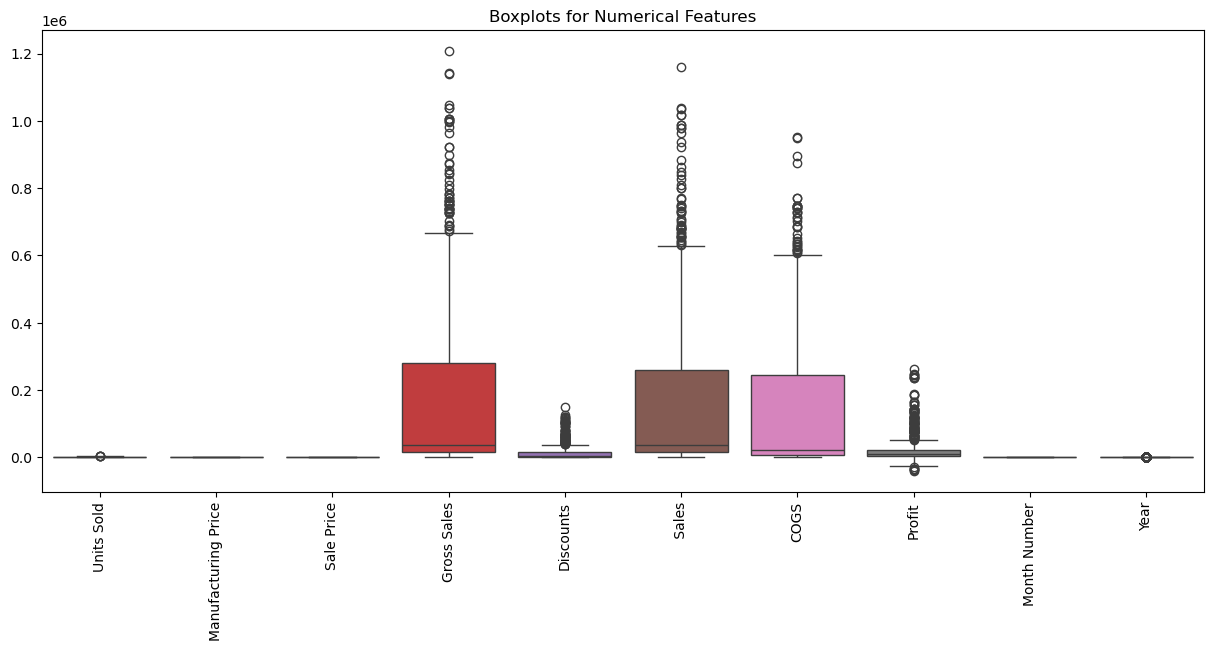

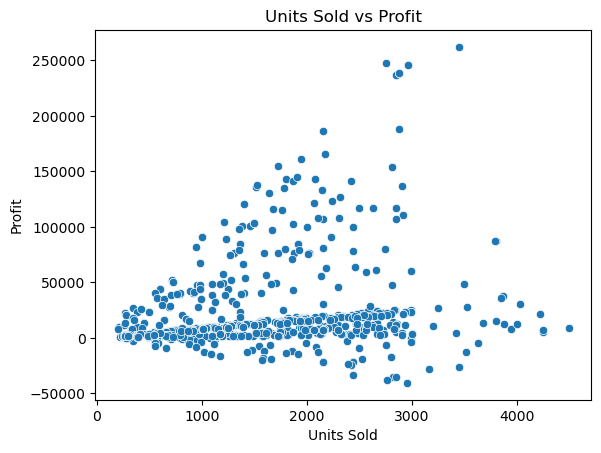

In [35]:
# Histograms
df.hist(figsize=(15,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=90)
plt.show()

# Scatterplot example
sns.scatterplot(x='Units Sold', y='Profit', data=df)
plt.title("Units Sold vs Profit")
plt.show()


## Pattern & Trend Detection

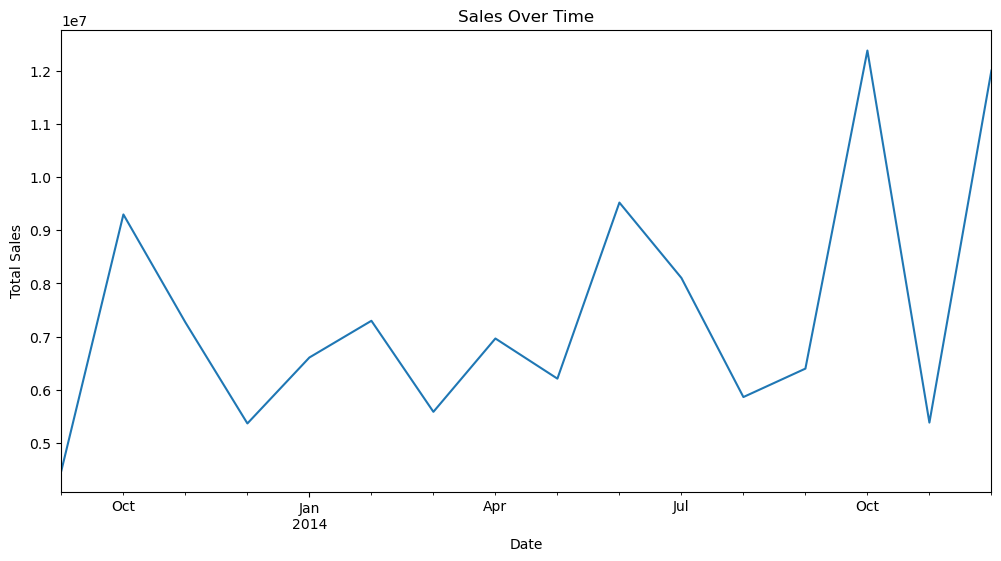

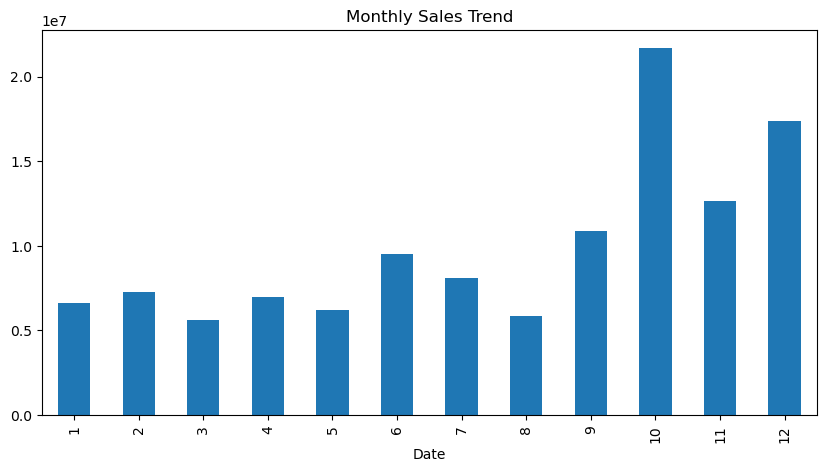

In [36]:
# Convert date column if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sales over time
sales_over_time = df.groupby('Date')[' Sales'].sum()
plt.figure(figsize=(12,6))
sales_over_time.plot()
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Monthly trends
monthly_trend = df.groupby(df['Date'].dt.month)[' Sales'].sum()
monthly_trend.plot(kind='bar', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.show()


## Outlier Detection

Number of rows with outliers: 38


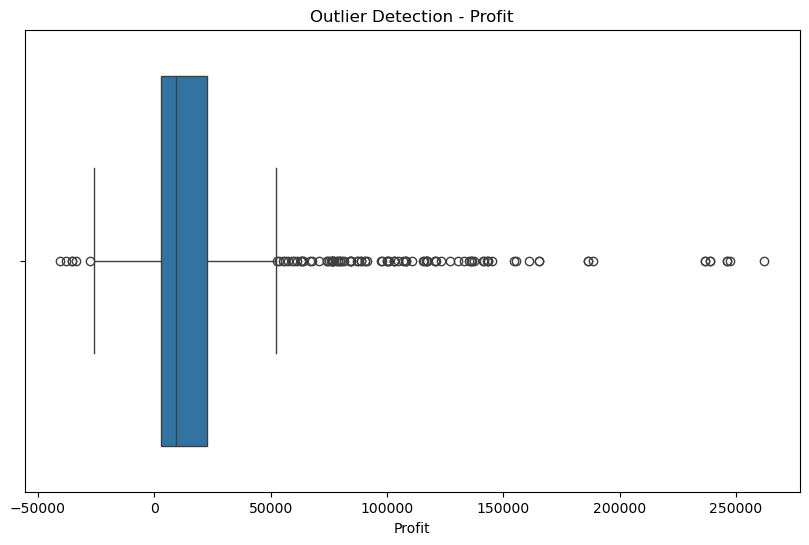

In [37]:
# Z-score method
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum(axis=1)
print(f"Number of rows with outliers: {sum(outliers > 0)}")

# Visualizing outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Profit'])
plt.title("Outlier Detection - Profit")
plt.show()


## Categorical Analysis

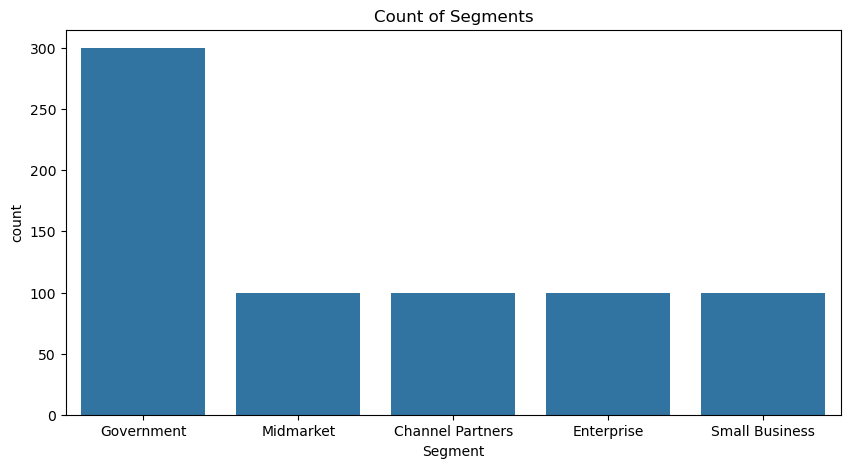

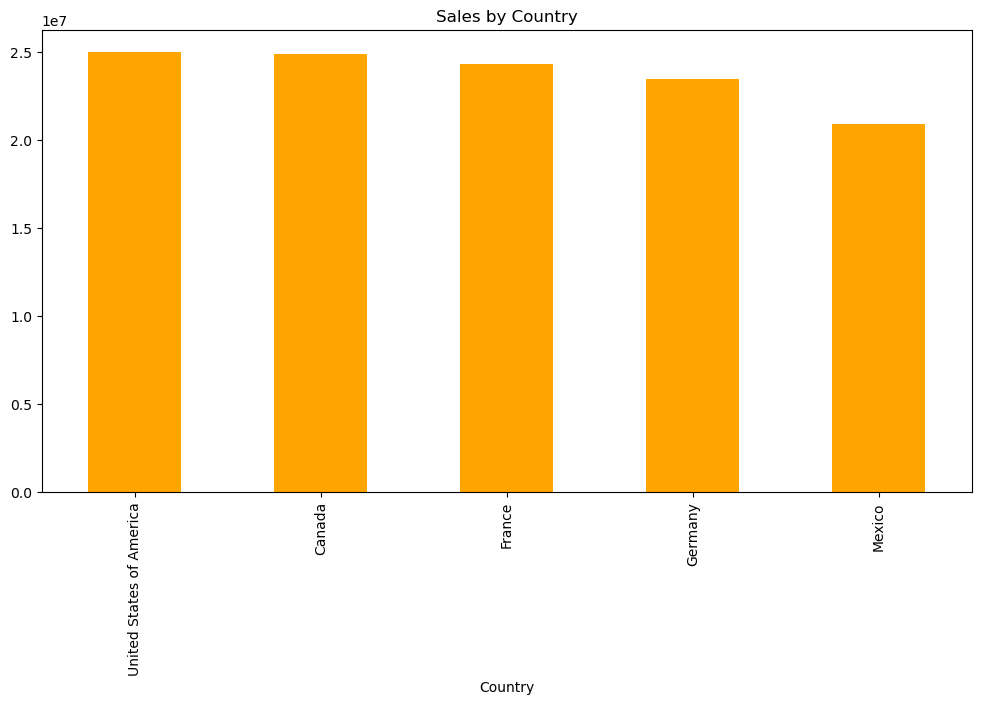

In [38]:
# Count plots
plt.figure(figsize=(10,5))
sns.countplot(x='Segment', data=df)
plt.title("Count of Segments")
plt.show()

# Sales by Category
sales_by_country = df.groupby('Country')[' Sales'].sum().sort_values(ascending=False)
sales_by_country.plot(kind='bar', figsize=(12,6), color='orange')
plt.title("Sales by Country")
plt.show()


## Value Counts

In [39]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Value counts for Segment:
 Segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64

Value counts for Country:
 Country
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: count, dtype: int64

Value counts for Product:
 Product
Paseo        202
Velo         109
VTT          109
Amarilla      94
Montana       93
Carretera     93
Name: count, dtype: int64

Value counts for Discount Band:
 Discount Band
High      245
Medium    242
Low       160
Name: count, dtype: int64

Value counts for Month Name:
 Month Name
October      140
December     105
September     70
June          70
November      70
January       35
March         35
August        35
July          35
February      35
April         35
May           35
Name: count, dtype: int64

Value counts for Product ID:
 Product ID
PR

## Feature distribution comparisons

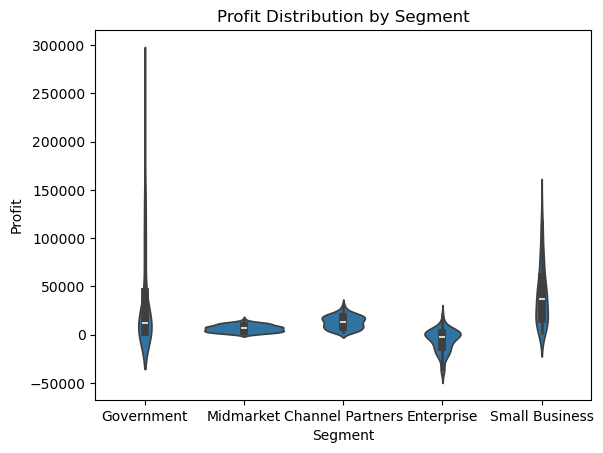

In [40]:
sns.violinplot(x='Segment', y='Profit', data=df)
plt.title("Profit Distribution by Segment")
plt.show()


## Pairwise relationship plots:

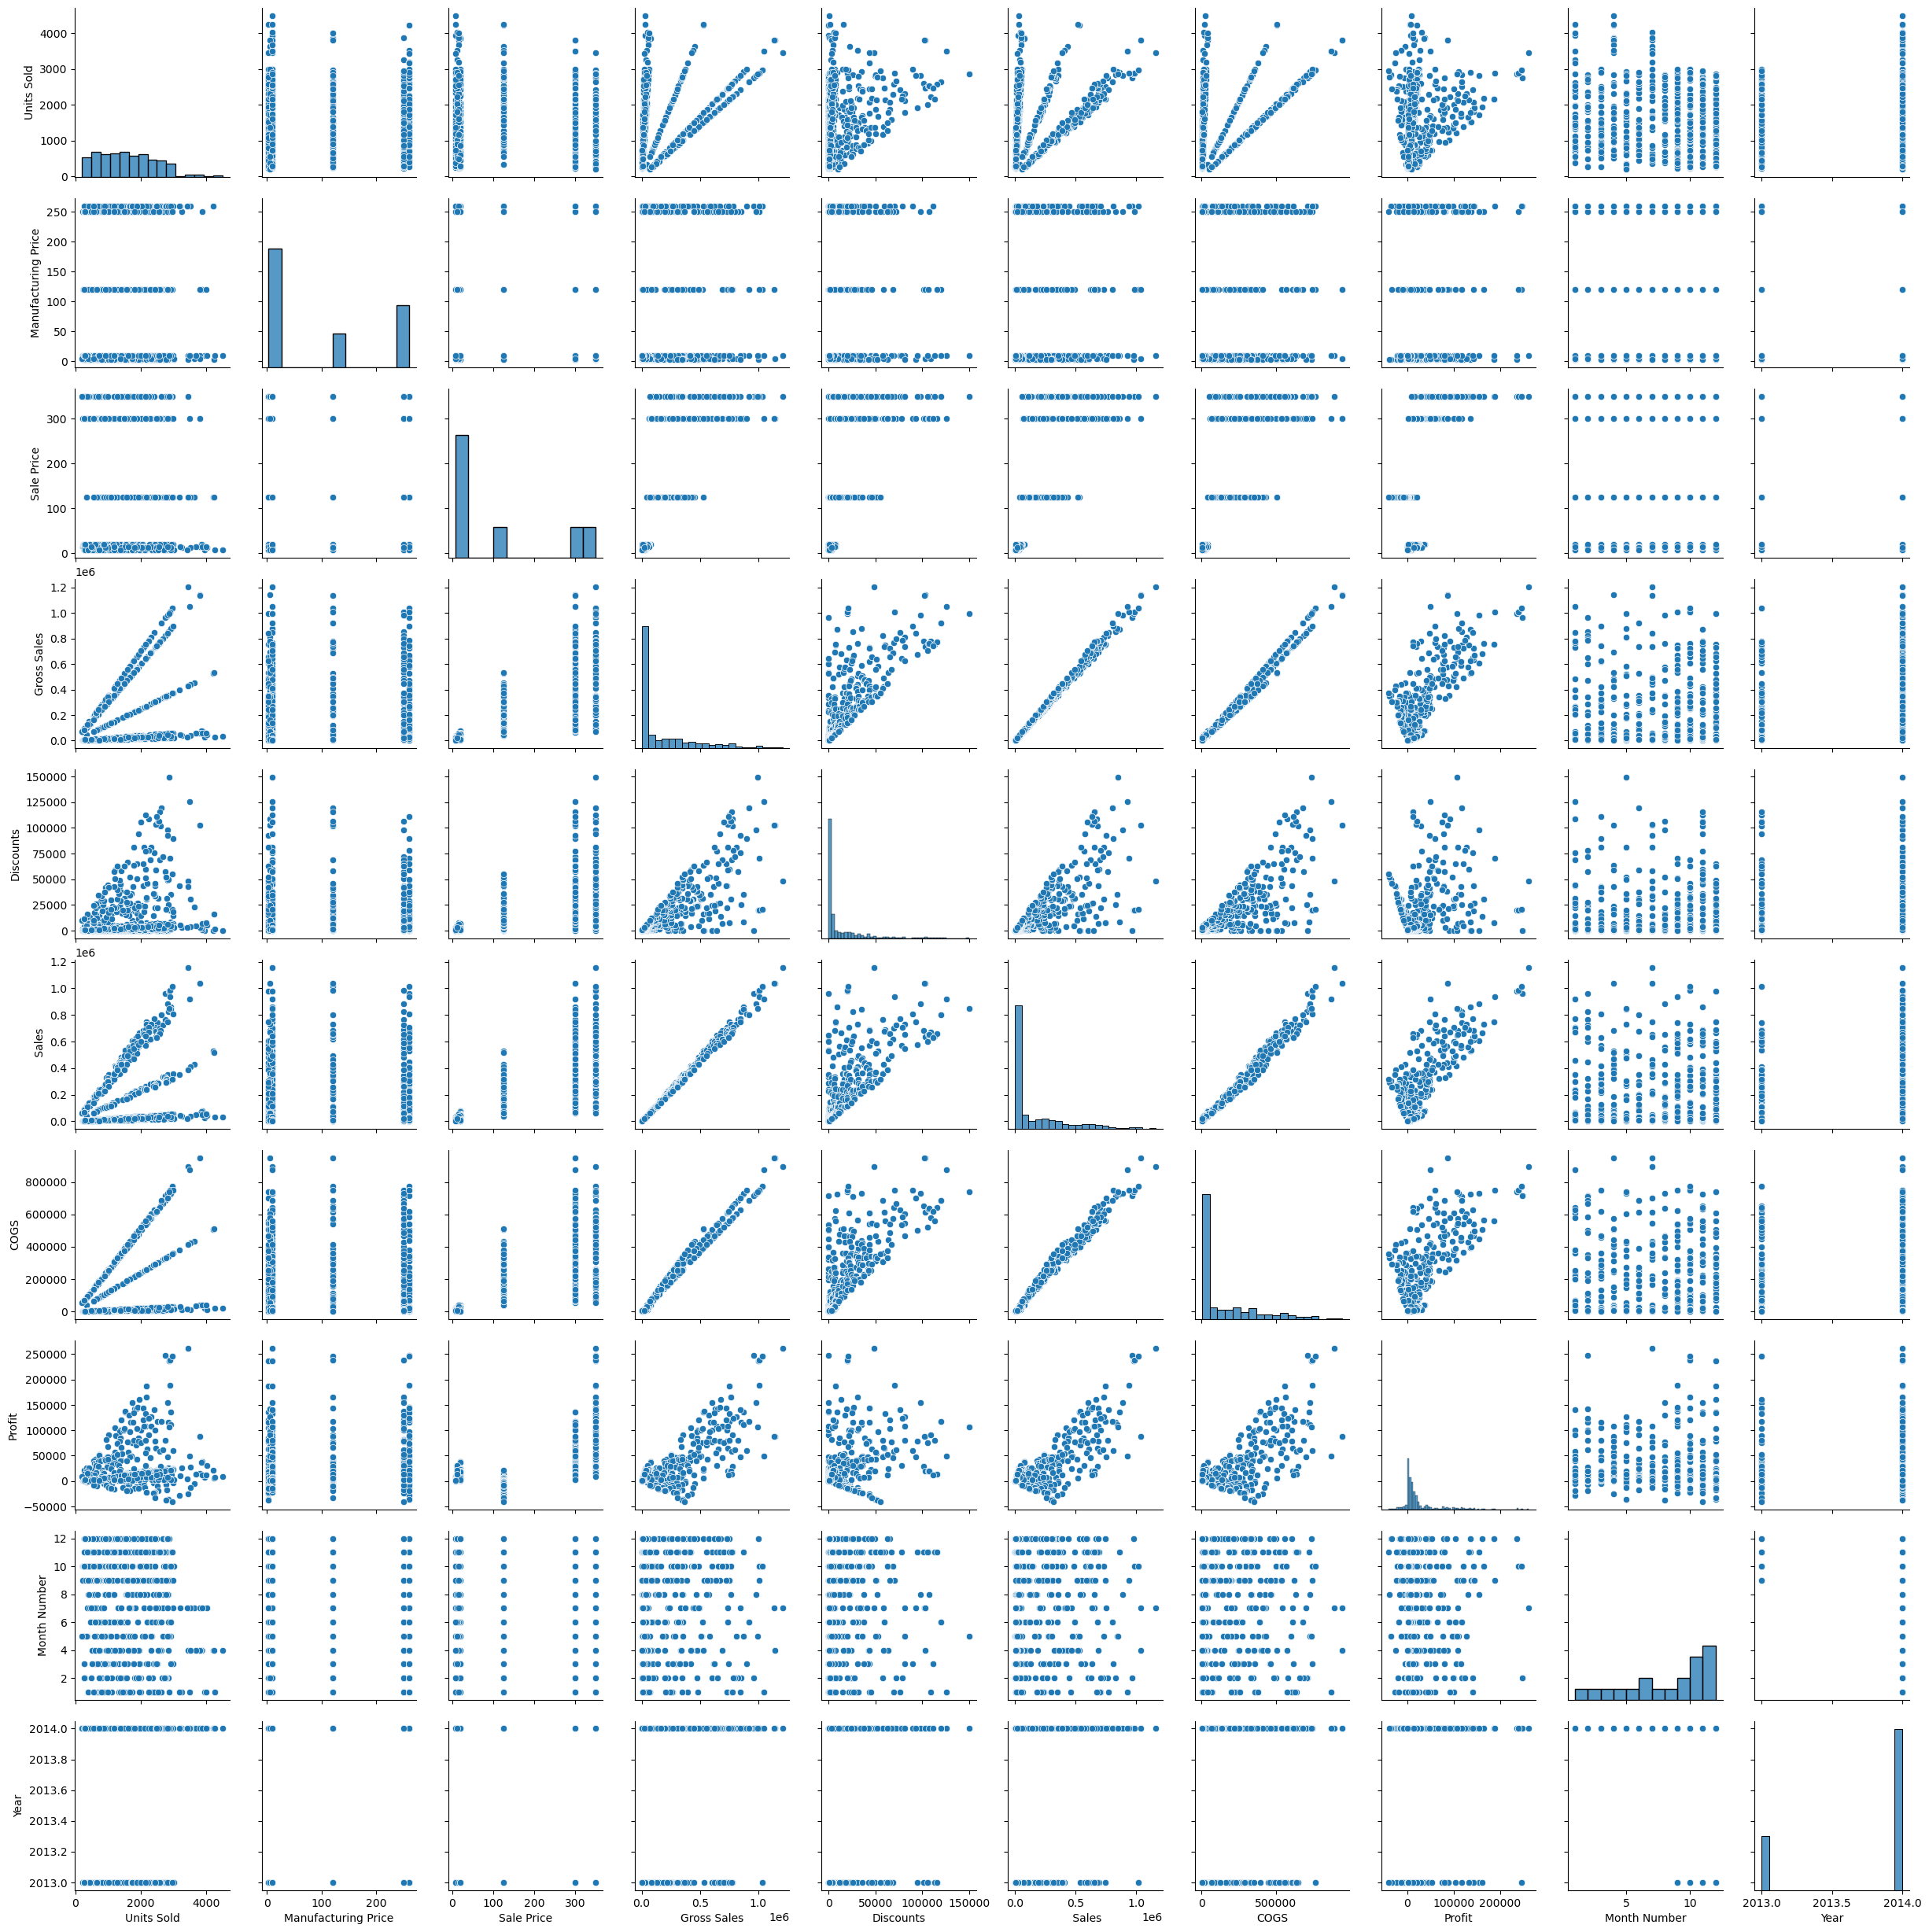

In [41]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

## Time Series Patterns

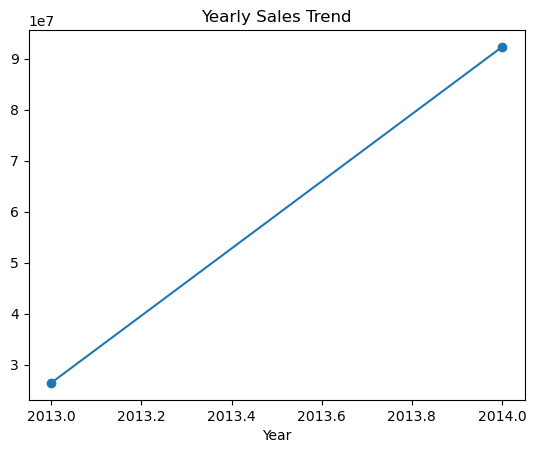

In [42]:
df['Year'] = df['Date'].dt.year
df.groupby('Year')[' Sales'].sum().plot(kind='line', marker='o')
plt.title("Yearly Sales Trend")
plt.show()


## Scatterplots for Relationship Detection

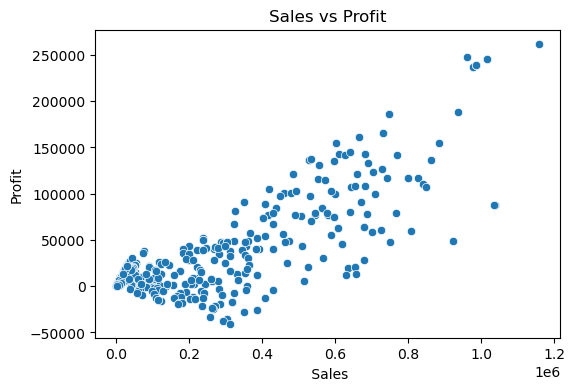

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df[' Sales'], y=df['Profit']) # Example columns
plt.title("Sales vs Profit")
plt.show()


## Univariate Analysis (Distribution)

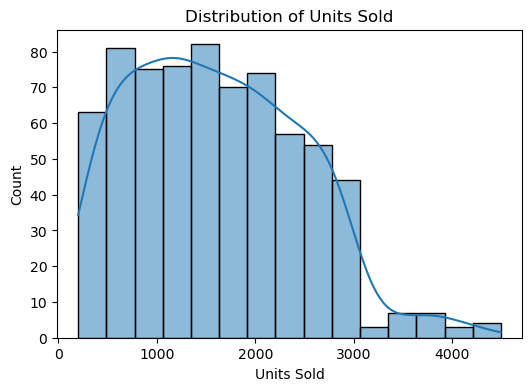

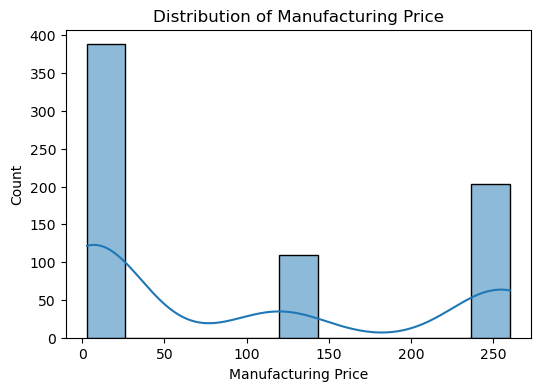

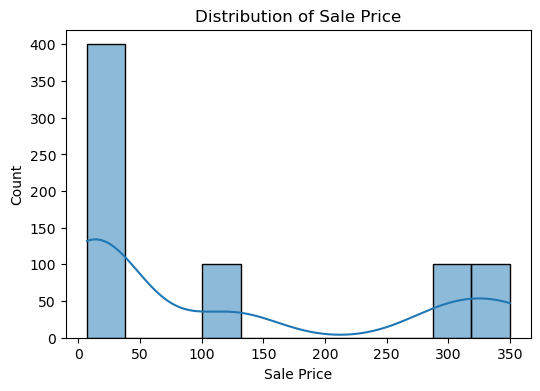

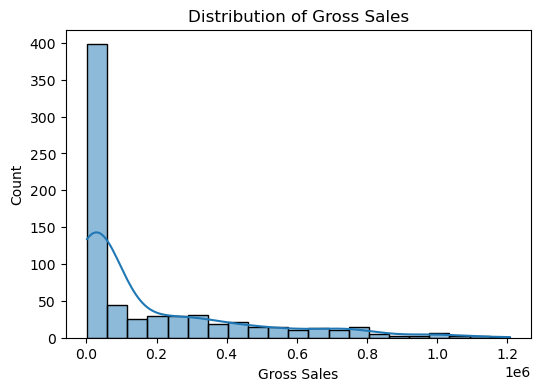

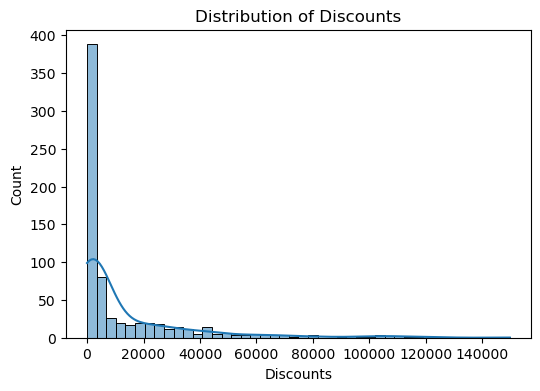

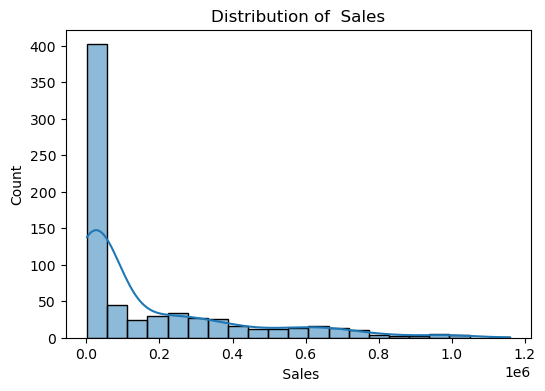

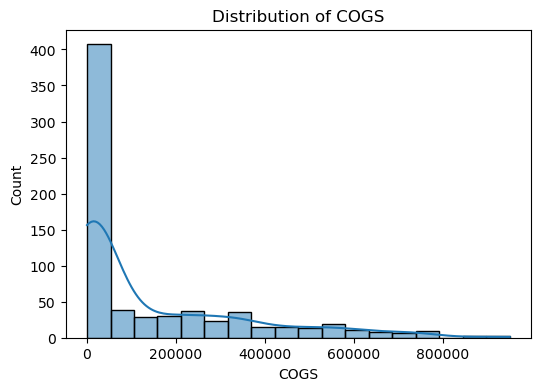

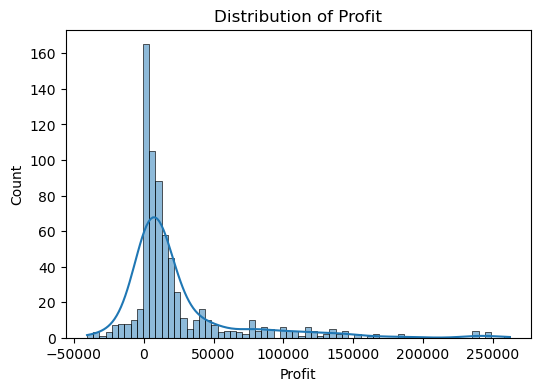

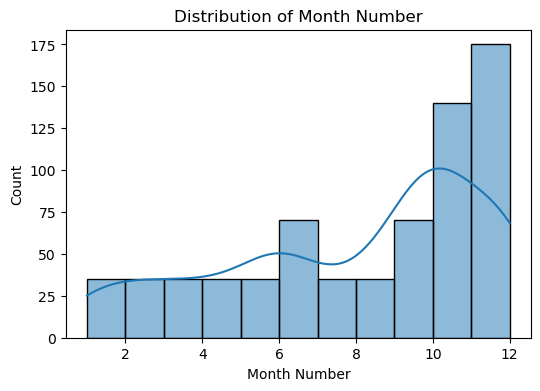

In [44]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


## Univariate Analysis (Single Variable)

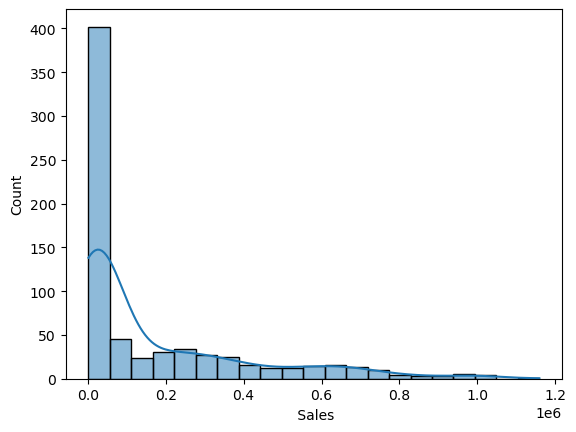

In [45]:
sns.histplot(df[' Sales'], kde=True)
plt.show()


## Bivariate Analysis (Two Variables)

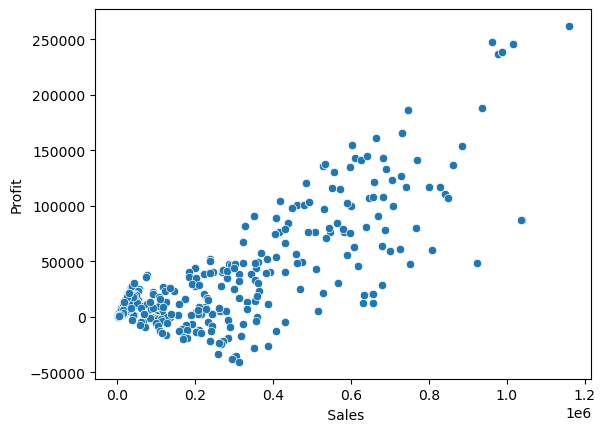

In [46]:
sns.scatterplot(data=df, x=' Sales', y='Profit')
plt.show()


## Multivariate Analysis (Three or More Variables)

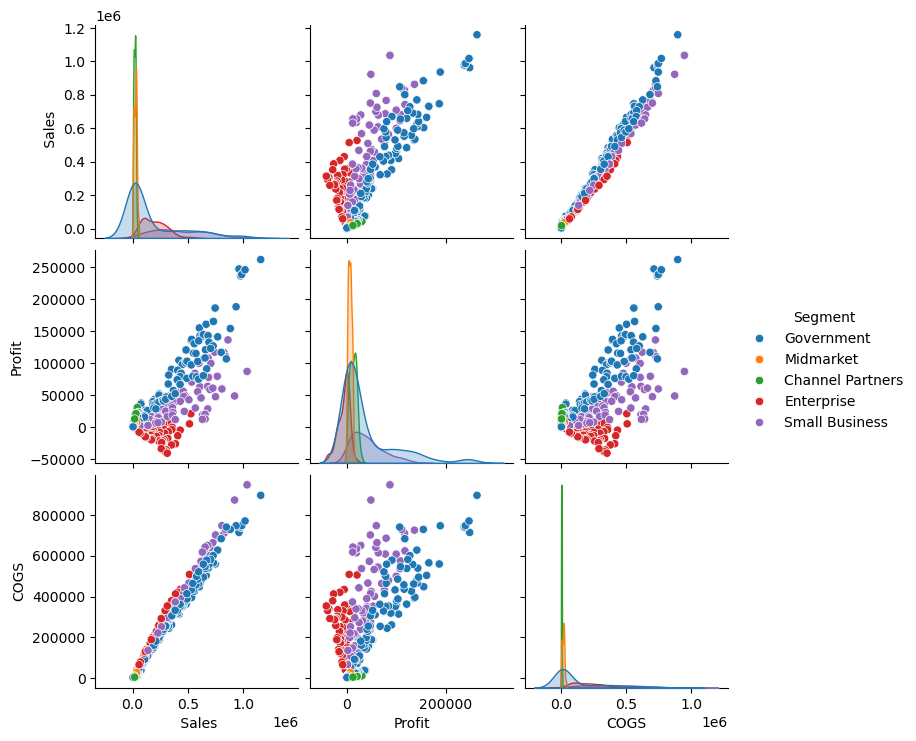

In [47]:
sns.pairplot(df, vars=[' Sales', 'Profit', 'COGS'], hue='Segment')
plt.show()


### Use Plotly For Interactive Graphs

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year', 'Product ID'],
      dtype='object')


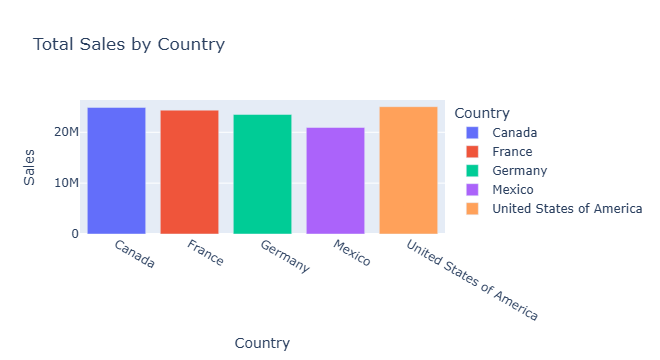

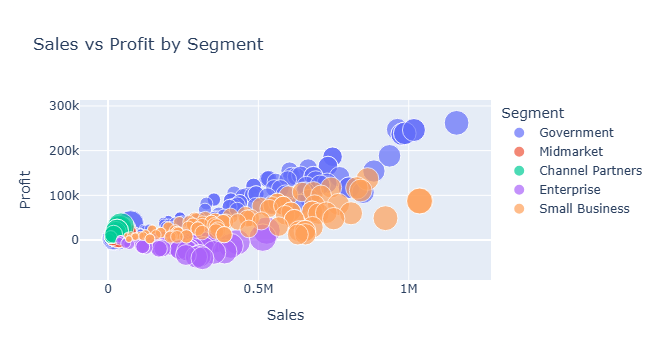

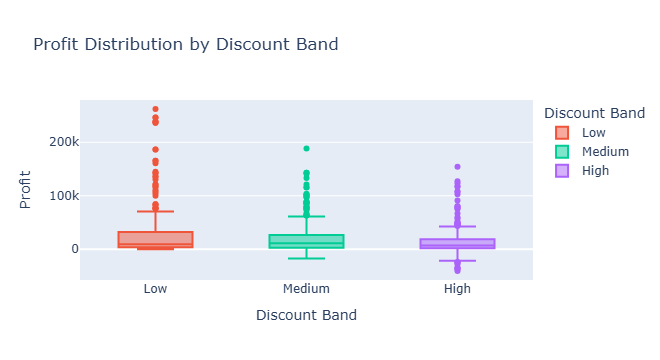

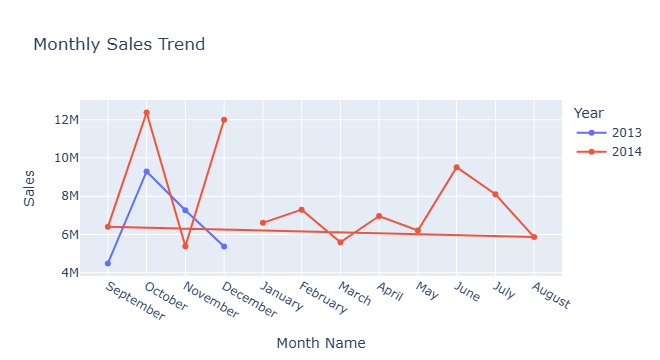

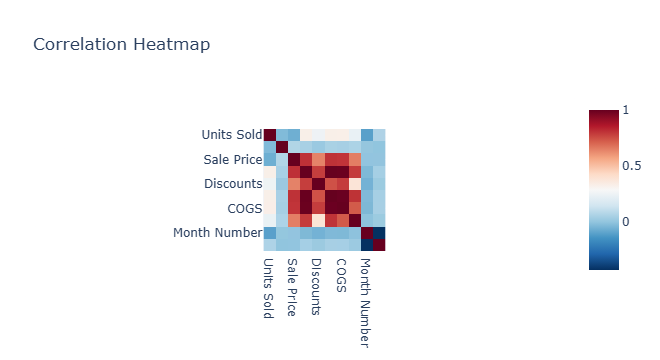

In [51]:
# --- Check column names ---
print(df.columns)

# Example output:

# ['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
#  'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
#  ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 
#  'Month Name', 'Year', 'Product ID']

# --- Bar chart: Total Sales by Country ---
fig1 = px.bar(
    df.groupby("Country", as_index=False).agg({" Sales": "sum"}),
    x="Country", y=" Sales",
    title="Total Sales by Country",
    color="Country"
)
fig1.show()

# --- Scatter plot: Sales vs Profit by Segment ---
fig2 = px.scatter(
    df,
    x=" Sales", y="Profit",
    color="Segment",
    size="Units Sold",
    hover_data=["Country", "Product"],
    title="Sales vs Profit by Segment"
)
fig2.show()

# --- Boxplot: Profit distribution by Discount Band ---
fig3 = px.box(
    df,
    x="Discount Band",
    y="Profit",
    color="Discount Band",
    title="Profit Distribution by Discount Band"
)
fig3.show()

# --- Time series: Monthly Sales trend ---
monthly_sales = df.groupby(["Year", "Month Number", "Month Name"], as_index=False).agg({" Sales": "sum"})
monthly_sales = monthly_sales.sort_values(["Year", "Month Number"])

fig4 = px.line(
    monthly_sales,
    x="Month Name", y=" Sales",
    color="Year",
    title="Monthly Sales Trend",
    markers=True
)
fig4.show()

# --- Heatmap: Correlation matrix ---
numeric_df = df.select_dtypes(include="number")
corr = numeric_df.corr()

fig5 = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation Heatmap"
)
fig5.show()


## Conclusion

#### This EDA transformed raw data into a clean, structured, and insight-ready dataset.
#### We addressed missing values, outliers, and inconsistencies, while visualizations uncovered key distributions, correlations, and trends.
#### The analysis not only improved data quality but also built a strong foundation for deeper analytics and modeling.